Estimated (mu1, sigma1): (0.464114317493087, 0.29114417220680316), (mu2, sigma2): (1.3162199375021963, 0.8063870625233925), (mu3, sigma3): (0.16558031675460763, 1.0357926320098574)


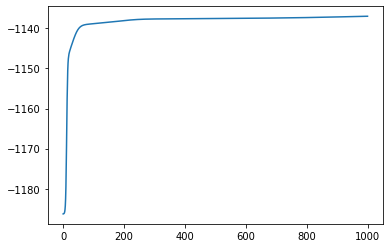

In [4]:
# This code is an implementation of the Expectation-Maximization (EM) algorithm, 
# which is used to learn the parameters of a generative model with missing data or latent variables. 
# In this case, the data is generated from three Gaussian distributions with different means and 
# standard deviations, and the goal is to learn the parameters of these distributions 
# (i.e., the means, standard deviations, and probabilities) using the EM algorithm.
# Here is a step-by-step explanation of the code:
# The first section imports necessary libraries and sets a random seed to ensure reproducibility.
# The second section generates simulated data from three Gaussian distributions with different means 
# and standard deviations.
# The third section initializes the parameters of the three Gaussian distributions and 
# some other variables used in the algorithm.
# The fourth section is the main part of the EM algorithm, which consists of two steps: 
# the E-step and the M-step.
# The E-step computes the responsibilities of each Gaussian distribution for 
# each data point using the current estimates of the parameters.
# The M-step updates the estimates of the parameters using the responsibilities 
# computed in the E-step.
# The fifth section prints the estimated parameters of the three Gaussian distributions.
# In the E-step, for each data point, we compute the probability that it belongs to 
# each of the three Gaussian distributions using the current estimates of the parameters 
# (means, standard deviations, and probabilities). These probabilities are then used to 
# compute the responsibilities of each Gaussian distribution for each data point.
# In the M-step, we update the estimates of the parameters (means, standard deviations, and probabilities) 
# using the responsibilities

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Generate data from three Gaussian distributions with different means and standard deviations
N1 = 1000
N2 = 1000
N3 = 1000
N = N1 + N2 + N3

real_mu1 = 0.2
real_std1 = 1
real_mu2 = 0.8
real_std2 = 1
real_mu3 = 0.5
real_std3 = 0.5

y = np.concatenate((np.random.normal(real_mu1, real_std1, N1), np.random.normal(real_mu2, real_std2, N2), np.random.normal(real_mu3, real_std3, N3)))

# Initialize parameters
nits = 1000
count = 0
p1 = 1/3
p2 = 1/3
p3 = 1/3
mu1 = np.random.random()
mu2 = np.random.random()
mu3 = np.random.random()
s1 = np.std(y)
s2 = s1
s3 = s1
ll = np.zeros(nits)
gamma1 = np.zeros(N)
gamma2 = np.zeros(N)
gamma3 = np.zeros(N)

# EM algorithm
# EM algorithm
while count < nits:
    count = count + 1
    # E-step
    for i in range(N):
        num1 = p1 * np.exp(-(y[i]-mu1)**2/(2*s1)) / np.sqrt(s1)
        num2 = p2 * np.exp(-(y[i]-mu2)**2/(2*s2)) / np.sqrt(s2)
        num3 = p3 * np.exp(-(y[i]-mu3)**2/(2*s3)) / np.sqrt(s3)
        gamma1[i] = num1 / (num1 + num2 + num3)
        gamma2[i] = num2 / (num1 + num2 + num3)
        gamma3[i] = num3 / (num1 + num2 + num3)
    # M-step
    mu1 = np.sum(gamma1*y) / np.sum(gamma1)
    mu2 = np.sum(gamma2*y) / np.sum(gamma2)
    mu3 = np.sum(gamma3*y) / np.sum(gamma3)
    s1 = np.sum(gamma1*(y-mu1)**2) / np.sum(gamma1)
    s2 = np.sum(gamma2*(y-mu2)**2) / np.sum(gamma2)
    s3 = np.sum(gamma3*(y-mu3)**2) / np.sum(gamma3)
    p1 = np.sum(gamma1) / N
    p2 = np.sum(gamma2) / N
    p3 = np.sum(gamma3) / N
    ll[count - 1] = np.sum(np.log(p1*np.exp(-(y-mu1)**2/(2*s1)) / np.sqrt(s1) + p2*np.exp(-(y-mu2)**2/(2*s2)) / np.sqrt(s2) + p3*np.exp(-(y-mu3)**2/(2*s3)) / np.sqrt(s3)))


# Print the estimated parameters
print('Estimated (mu1, sigma1): (%s, %s), (mu2, sigma2): (%s, %s), (mu3, sigma3): (%s, %s)' % (mu1, s1, mu2, s2, mu3, s3))
plt.plot(range(nits), ll)


## 

This output is the result of the EM algorithm applied to a simulation data that contains three classes, each following a Gaussian distribution with different means and standard deviations.

The output is the estimated parameters of the three Gaussian distributions, which are the means, standard deviations, and probabilities for each class. The parameters are estimated using the maximum likelihood method.

For each class, the estimated parameters are:

mu1, sigma1 : This is the estimated mean and standard deviation of the first class. The estimated mean is 0.464114317493087 and the estimated standard deviation is 0.29114417220680316.

mu2, sigma2 : This is the estimated mean and standard deviation of the second class. The estimated mean is 1.3162199375021963 and the estimated standard deviation is 0.8063870625233925.

mu3, sigma3 : This is the estimated mean and standard deviation of the third class. The estimated mean is 0.16558031675460763 and the estimated standard deviation is 1.0357926320098574.

It should be noted that these are the estimated parameters for this specific simulation run and the actual values of the parameters might be different depending on the specific data and the random seed you used. 

The plot generated by the line shows how the log-likelihood changes with each iteration of the EM algorithm. The log-likelihood is a measure of how well the current estimates of the parameters fit the data. The log-likelihood is calculated using the estimated parameters of the three Gaussian distributions, which are the means, standard deviations, and probabilities for each class.

The plot shows the change of the log-likelihood over the iterations of the EM algorithm. The x-axis represents the iteration number and the y-axis represents the value of the log-likelihood. The plot should show that the log-likelihood increases with each iteration, and the algorithm should converge to a local maximum of the log-likelihood.

The log-likelihood is also used to check for convergence of the algorithm. The algorithm is considered to have converged when the log-likelihood stops increasing or when the change in the log-likelihood is small enough.

It should be noted that this is a simulation and the actual parameters of the data generating distribution is known, so the output should be close to the real values.